In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from tld import get_tld, is_tld

In [2]:
data = pd.read_csv("../datasets/preprocessed_malicious_phish.csv")
data.head()

,url,type,Category,url_len,domain,@,?,-,=,.,...,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,...,0,0,0,0,0,0,0,13,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,...,0,0,0,0,0,0,1,29,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,...,0,0,0,0,0,0,1,25,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,...,0,0,0,1,1,0,7,60,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,...,0,0,0,1,1,0,22,199,0,0


In [3]:
X = data.drop(['url','type','Category','domain'],axis=1)#,'type_code'
y = data['Category']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [6]:
X_test.shape
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130239 entries, 238731 to 212458
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   url_len             130239 non-null  int64
 1   @                   130239 non-null  int64
 2   ?                   130239 non-null  int64
 3   -                   130239 non-null  int64
 4   =                   130239 non-null  int64
 5   .                   130239 non-null  int64
 6   #                   130239 non-null  int64
 7   %                   130239 non-null  int64
 8   +                   130239 non-null  int64
 9   $                   130239 non-null  int64
 10  !                   130239 non-null  int64
 11  *                   130239 non-null  int64
 12  ,                   130239 non-null  int64
 13  //                  130239 non-null  int64
 14  abnormal_url        130239 non-null  int64
 15  https               130239 non-null  int64
 16  digits              

In [7]:
from sklearn.metrics import confusion_matrix

#############################################
######-Model => <class 'sklearn.ensemble._forest.RandomForestClassifier'> 
Test Accuracy :  91.50%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     85565
           1       0.94      0.97      0.95     19319
           2       0.83      0.57      0.68     18805
           3       0.97      0.91      0.94      6550

    accuracy                           0.91    130239
   macro avg       0.91      0.86      0.88    130239
weighted avg       0.91      0.91      0.91    130239

             Confusion_matrix 


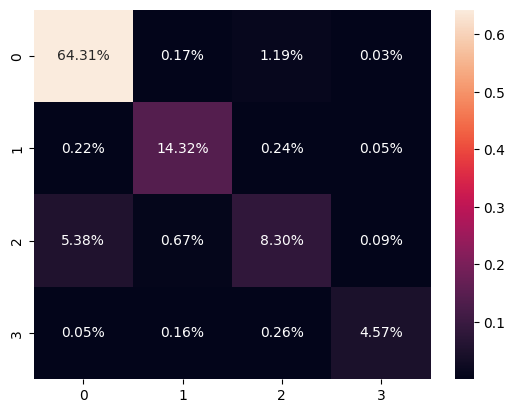

###################- End -###################


In [21]:

# models = [DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,KNeighborsClassifier,SGDClassifier,
#          ExtraTreesClassifier,GaussianNB]
models = [RandomForestClassifier]
accuracy_test=[]
best_model = None
best_accuracy = 0.0

for m in models:
    print('#############################################')
    print('######-Model =>\033[07m {} \033[0m'.format(m))
    # building/training model
    model_ = m()
    model_.fit(X_train, y_train)
    pred = model_.predict(X_test)
    # evaluation model
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    # plotting evaluation
    cf_matrix = confusion_matrix(y_test, pred)
    plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
    plt.show()
    print('\033[31m###################- End -###################\033[0m')
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model_

In [22]:
# output = pd.DataFrame({"Model":['Decision Tree Classifier','Random Forest Classifier',
#                                 'AdaBoost Classifier','KNeighbors Classifier','SGD Classifier',
#                                 'Extra Trees Classifier','Gaussian NB'],
#                       "Accuracy":accuracy_test})
output = pd.DataFrame({"Model":['Random Forest Classifier'],
                      "Accuracy":accuracy_test})
print(output)

                      Model  Accuracy
0  Random Forest Classifier  0.914979


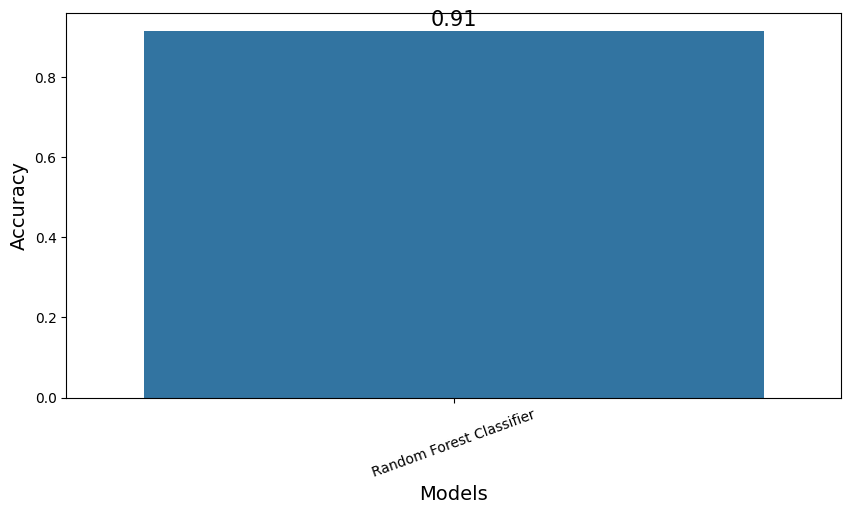

In [23]:
plt.figure(figsize=(10, 5))
plots = sns.barplot(x='Model', y='Accuracy', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.xticks(rotation=20);
plt.ylabel("Accuracy", size=14)
plt.show()

In [24]:
import joblib 
# Save the best model using joblib
joblib.dump(best_model, '../models/best_url_phishing_model.pkl')

['best_phishing_url_model.pkl']